In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join, abspath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import sys
sys.path.insert(0, abspath("./../../"))

In [4]:
from utils.pandas import apply_filters
from utils.plt import configure_ax

from utils_local import read_spreadsheet

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

### Load result file

In [6]:
df = read_spreadsheet(gid_key="temporality")
df.dropna(inplace=True)

In [7]:
df

,Frames,UCF-101,SS-v2,Gym-99,NTU-60,EPIC-Kitchens-100,Kinetics-400,Charades,AVA,HMDB-51
0,1,80.04​,18.69​,60.61​,56.88​,28.33​,37.99,9.541,13.385,45.29
1,8,91.22​,40.89​,83.71​,90.45​,36.06​,56.47,12.562,15.586,57.45
2,16,93.58​,52.88​,88.11​,93.89​,40.22​,60.82,14.617,17.081,65.49
3,32,94.01​,61.05​,91.77​,94.90​,47.67​,61.31,23.098,17.938,68.50


In [8]:
for c in set(df.columns) - {"Frames", "K400"}:
    df[c] = df[c].apply(lambda x: x.split("\u200b")[0]).astype(float)

AttributeError: 'float' object has no attribute 'split'

In [9]:
df

,Frames,UCF101,SSv2,Gym99,NTU60,EPIC (V),K400
0,1,80.04,18.69,60.61,56.88,28.33,37.99
1,8,91.22,40.89,83.71,90.45,36.06,56.47
2,16,93.58,52.88,88.11,93.89,40.22,60.82
3,32,94.01,61.05,91.77,94.90,47.67,61.31


### Plot

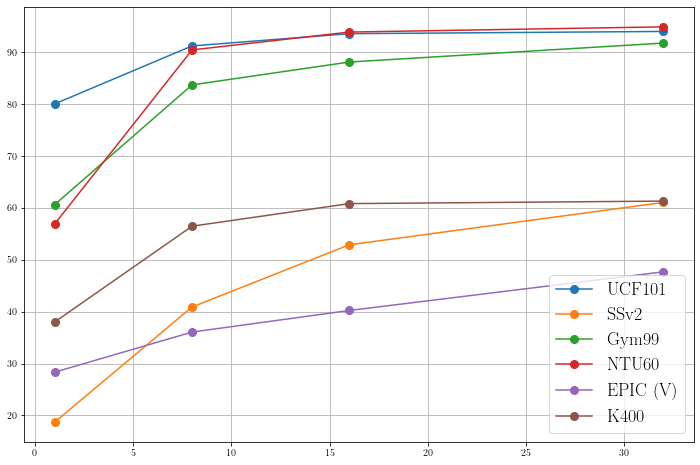

In [10]:
H, W = 10, 13

legendsize = 18

fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()

for d in df.columns:
    if d == "Frames":
        continue
    ax.plot(df["Frames"], df[d], label=d, marker="o", markersize=8,)
    
ax.legend(fontsize=legendsize)
plt.show()

In [11]:
# H, W = 10, 13

# legendsize = 18

# fig, ax = plt.subplots(figsize=(12, 8))

# ax.grid()

# for d in df.columns:
#     if d == "Frames":
#         continue
#     ax.plot(np.log2(df["Frames"]), df[d].values, label=d, marker="o", markersize=8,)
    
# ax.legend(fontsize=legendsize)
# plt.show()

In [12]:
np.gradient(np.log2(df["Frames"]), df[d].values).mean()

1.0694117231531128

In [13]:
df

,Frames,UCF101,SSv2,Gym99,NTU60,EPIC (V),K400
0,1,80.04,18.69,60.61,56.88,28.33,37.99
1,8,91.22,40.89,83.71,90.45,36.06,56.47
2,16,93.58,52.88,88.11,93.89,40.22,60.82
3,32,94.01,61.05,91.77,94.90,47.67,61.31


### Compute metric

In [15]:
df

,Frames,UCF101,SSv2,Gym99,NTU60,EPIC (V),K400
0,1,80.04,18.69,60.61,56.88,28.33,37.99
1,8,91.22,40.89,83.71,90.45,36.06,56.47
2,16,93.58,52.88,88.11,93.89,40.22,60.82
3,32,94.01,61.05,91.77,94.90,47.67,61.31


In [72]:
frames = df["Frames"].values
datasets = set(df.columns) - {"Frames"}

# compute mean of fractional change
mfc = dict()

# compute gradients
grads = dict()

# compute log-grad
log_grads = dict()

# compute second order gradients
sog = dict()

# compute % change
pct_change = dict()

deltas = dict()

fraction = dict()

for dataset in datasets:
    yvalues = df[dataset].values
    # mfc[dataset] = (yvalues[1:] / yvalues[:-1]).mean()
    # mfc[dataset] = ((yvalues[1:] - yvalues[:-1]) / yvalues[0])
    mfc[dataset] = ((yvalues[1:] - yvalues[0]) / yvalues[0])
    
    grads[dataset] = np.divide(yvalues[1:] - yvalues[:-1], frames[1:] - frames[:-1]).mean()
    grads[dataset] = np.gradient(yvalues, frames).mean()
    grads[dataset] = np.gradient(yvalues, frames)
    grads[dataset] = np.divide(yvalues[1:] - yvalues[:-1], frames[1:] - frames[:-1])
    grads[dataset] = np.divide(yvalues[1:] - yvalues[0], frames[1:] - frames[0])
    
    log_grads[dataset] = np.gradient(np.log2(yvalues), np.log2(frames)).mean()
    
    sog[dataset] = np.gradient(np.gradient(yvalues, frames), frames).mean()
    
    pct_change[dataset] = 100 * ((yvalues[1:] - yvalues[:-1])/ yvalues[:-1]).mean()
    
    X = 100 * ((yvalues[1:] - yvalues[:-1])/ yvalues[:-1])
    # X *= frames[1:] - frames[:-1]
    X /= frames[1:] - frames[:-1]
    pct_change[dataset] = X.mean()
    
    # fraction[dataset] = (yvalues[1:]/ yvalues[:-1]).mean()
    fraction[dataset] = (yvalues[1:]/ yvalues[:-1])

In [73]:
df

,Frames,UCF101,SSv2,Gym99,NTU60,EPIC (V),K400
0,1,80.04,18.69,60.61,56.88,28.33,37.99
1,8,91.22,40.89,83.71,90.45,36.06,56.47
2,16,93.58,52.88,88.11,93.89,40.22,60.82
3,32,94.01,61.05,91.77,94.90,47.67,61.31


In [77]:
(36.06) / 28.33

1.2728556300741265

In [75]:
mfc

{'EPIC (V)': array([0.27285563, 0.41969643, 0.68266855]),
 'UCF101': array([0.13968016, 0.16916542, 0.17453773]),
 'SSv2': array([1.18780096, 1.82932049, 2.26645265]),
 'K400': array([0.4864438 , 0.60094762, 0.61384575]),
 'NTU60': array([0.59018987, 0.65066807, 0.66842475]),
 'Gym99': array([0.38112523, 0.45372051, 0.51410658])}

In [76]:
[(d, mfc[d].mean()) for d in mfc]

[('EPIC (V)', 0.458406871396635),
 ('UCF101', 0.16112776944860893),
 ('SSv2', 1.7611913679329405),
 ('K400', 0.5670790558919013),
 ('NTU60', 0.6364275668073136),
 ('Gym99', 0.4496507726997745)]

In [71]:
[(d, mfc[d][1:].mean()) for d in mfc]

[('EPIC (V)', 0.20490645958348042),
 ('UCF101', 0.01742878560719644),
 ('SSv2', 0.5393258426966291),
 ('K400', 0.0637009739405107),
 ('NTU60', 0.03911744022503519),
 ('Gym99', 0.06649067810592314)]

In [52]:
grads

{'EPIC (V)': array([1.10428571, 0.79266667, 0.62387097]),
 'UCF101': array([1.59714286, 0.90266667, 0.45064516]),
 'SSv2': array([3.17142857, 2.27933333, 1.36645161]),
 'K400': array([2.64      , 1.522     , 0.75225806]),
 'NTU60': array([4.79571429, 2.46733333, 1.22645161]),
 'Gym99': array([3.3       , 1.83333333, 1.00516129])}

In [54]:
[(d, grads[d].mean()) for d in grads]

[('EPIC (V)', 0.8402744495647724),
 ('UCF101', 0.9834848950332816),
 ('SSv2', 2.272404505888377),
 ('K400', 1.6380860215053759),
 ('NTU60', 2.829833077316948),
 ('Gym99', 2.046164874551971)]

In [43]:
df

,Frames,UCF101,SSv2,Gym99,NTU60,EPIC (V),K400
0,1,80.04,18.69,60.61,56.88,28.33,37.99
1,8,91.22,40.89,83.71,90.45,36.06,56.47
2,16,93.58,52.88,88.11,93.89,40.22,60.82
3,32,94.01,61.05,91.77,94.90,47.67,61.31


In [44]:
56.47 / 37.99

1.4864438010002632

In [42]:
fraction

{'EPIC (V)': array([1.27285563, 1.11536328, 1.18523123]),
 'UCF101': array([1.13968016, 1.02587152, 1.004595  ]),
 'SSv2': array([2.18780096, 1.29322573, 1.15450076]),
 'K400': array([1.4864438 , 1.07703205, 1.00805656]),
 'NTU60': array([1.59018987, 1.03803206, 1.01075727]),
 'Gym99': array([1.38112523, 1.05256242, 1.04153899])}

In [26]:
pct_change

{'EPIC (V)': 2.165891263907737,
 'UCF101': 0.7825145306224289,
 'SSv2': 7.199845503030318,
 'K400': 2.65415043816641,
 'NTU60': 2.991305870676778,
 'Gym99': 2.1204316599629895}

In [31]:
frames, yvalues

(array([ 1,  8, 16, 32]), array([60.61, 83.71, 88.11, 91.77]))

In [33]:
100 * (np.diff(yvalues) / yvalues[:-1])

array([38.11252269,  5.25624179,  4.15389854])

In [38]:
100 * (np.diff(yvalues) / yvalues[:-1]) / (frames[1:] - frames[:-1])

array([5.4446461 , 0.65703022, 0.25961866])

In [20]:
log_grads

{'EPIC (V)': 0.17741839658592057,
 'UCF101': 0.033644747052992655,
 'SSv2': 0.31130965227569274,
 'K400': 0.09736710336098783,
 'NTU60': 0.0923253894380062,
 'Gym99': 0.09363980521749446}

In [69]:
(yvalues[1:] - yvalues[:-1]) / yvalues[:-1]

array([0.59018987, 0.03803206, 0.01075727])

In [70]:
mfc

{'EPIC (V)': 1.191150047245103,
 'K400': 1.1905108045864896,
 'UCF101': 1.0567155594183584,
 'Gym99': 1.1584088766968954,
 'SSv2': 1.5451758156910884,
 'NTU60': 1.2129930681583747}

In [71]:
grads

{'EPIC (V)': 0.6966369047619049,
 'K400': 1.0714583333333334,
 'UCF101': 0.6396726190476189,
 'Gym99': 1.3595833333333331,
 'SSv2': 1.7269345238095237,
 'NTU60': 1.7629464285714285}

In [72]:
sog

{'EPIC (V)': -0.027365389384920665,
 'K400': -0.1063511284722222,
 'UCF101': -0.0647623387896825,
 'Gym99': -0.13047656249999995,
 'SSv2': -0.0997305927579365,
 'NTU60': -0.2034583953373016}

In [73]:
pct_change

{'EPIC (V)': 19.115004724510296,
 'K400': 19.051080458648954,
 'UCF101': 5.671555941835837,
 'Gym99': 15.840887669689538,
 'SSv2': 54.51758156910883,
 'NTU60': 21.29930681583748}

In [134]:
LR = LinearRegression()

In [111]:
pct_change = dict()

for dataset in datasets:
    yvalues = df[dataset].values
    
    grads = np.divide(yvalues[1:] - yvalues[:-1], frames[1:] - frames[:-1])
    grads = np.gradient(yvalues, frames)
    
    pct_change[dataset] = 100 * ((yvalues[1:] - yvalues[:-1])/ yvalues[:-1])
    break

In [112]:
grads

array([1.10428571, 0.83161905, 0.501875  , 0.465625  ])

In [113]:
pct_change

{'EPIC (V)': array([27.28556301, 11.53632834, 18.52312282])}

In [114]:
frames, yvalues

(array([ 1,  8, 16, 32]), array([28.33, 36.06, 40.22, 47.67]))

In [129]:
thetas = np.polyfit(frames, yvalues, deg=2)
stationary_point = -0.5 * (thetas[1] / (thetas[2] + 0.00001))

f = lambda x: np.dot(thetas, np.array([1.0, x, x ** 2]))

In [130]:
[f(x) for x in frames]

[28.722498414159382, 1781.5462423895199, 7109.796363721875, 28406.370159540234]

In [ ]:
linear_regressor = sklm.LinearRegression()

In [132]:
yvalues

array([28.33, 36.06, 40.22, 47.67])

In [131]:
thetas * 

SyntaxError: invalid syntax (1416132502.py, line 1)

In [184]:
x, y = frames, yvalues

In [185]:
np.reshape(x, (1, -1)), y

(array([[ 1,  8, 16, 32]]), array([56.88, 90.45, 93.89, 94.9 ]))

In [186]:
x, y

(array([ 1,  8, 16, 32]), array([56.88, 90.45, 93.89, 94.9 ]))

In [189]:
delta = 0.05

Phi = np.ones((len(x), 2))
Phi[:, 1] = np.log(x)

thetas = np.dot(np.linalg.inv((np.matmul(Phi.T, Phi))), np.dot(Phi.T, y))

stationary_point = delta / thetas[1]

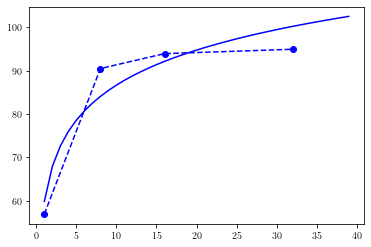

In [204]:
plt.plot(x, y, "o--", color="b")

xdummy = np.arange(1, 40, 1)
ydummy = [(thetas[0] + thetas[1] * np.log(x)) for x in xdummy]
plt.plot(xdummy, ydummy, color="b")

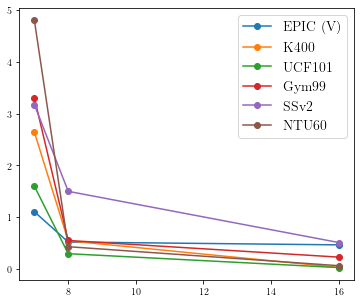

In [221]:
grads = dict()

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

for d in datasets:
    x, y = frames, df[d].values
    grads[d] = np.diff(y) / np.diff(x)
    ax.plot(np.diff(x), grads[d], "o-", label=d)

ax.legend(fontsize=14)

In [222]:
grads

{'EPIC (V)': array([1.10428571, 0.52      , 0.465625  ]),
 'K400': array([2.64    , 0.54375 , 0.030625]),
 'UCF101': array([1.59714286, 0.295     , 0.026875  ]),
 'Gym99': array([3.3    , 0.55   , 0.22875]),
 'SSv2': array([3.17142857, 1.49875   , 0.510625  ]),
 'NTU60': array([4.79571429, 0.43      , 0.063125  ])}

In [219]:
np.diff(x)

array([ 7,  8, 16])

In [208]:
np.diff(y) / np.diff(x)

array([4.79571429, 0.43      , 0.063125  ])

In [207]:
y

array([56.88, 90.45, 93.89, 94.9 ])

In [199]:
xdummy

array([1])

In [198]:
ydummy

[59.8049999999999]

In [190]:
thetas, stationary_point

(array([59.805     , 11.64976246]), 0.004291933006563125)

In [154]:
deg = 2

Phi = np.ones((len(x), deg + 1))
for i in range(deg):
    Phi[:, 1 + i] = np.reshape(np.power(x, i + 1), (1, -1))
    
thetas = np.dot(np.linalg.inv((np.matmul(Phi.T, Phi))), np.dot(Phi.T, y))

In [155]:
thetas

array([ 2.77085249e+01,  1.02666809e+00, -1.26945583e-02])

In [161]:
thetas = np.polyfit(yvalues, frames, deg=2)

In [164]:
thetas

array([ 0.05309636, -2.41892082, 26.78682813])

In [165]:
-0.5 * (thetas[1] / thetas[-1])

0.045151311009120336

In [143]:
Phi

array([[1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 3.200e+01, 1.024e+03]])

In [140]:
x

array([ 1,  8, 16, 32])

In [128]:
f(1)

array([-1.26945583e-02,  1.02666809e+00,  2.77085249e+01])

In [116]:
stationary_point

-0.018526206798044467

In [110]:
thetas

array([-0.093677  ,  4.19659965, 55.72734688])

In [97]:
yvalues[1:] - yvalues[:-1]

array([7.73, 4.16, 7.45])

In [98]:
yvalues

array([28.33, 36.06, 40.22, 47.67])

In [92]:
yvalues[:-1]

array([28.33, 36.06, 40.22])

In [88]:
100 * ((94.01 - 93.58) / 93.58)

0.459499893139567

In [26]:
frames, yvalues

(array([ 1,  8, 16, 32]), array([80.04, 91.22, 93.58, 94.01]))

In [45]:
np.gradient(yvalues, frames).mean()

1.9812321428571427

In [28]:
# metric 1: mean of fractional change

1.0567155594183584

In [32]:
94.01 / 93.58

1.0045949989313956

In [ ]:
mfc = 

In [27]:
df.rolling(1,axis=1).sum().pct_change(axis=1)

,Frames,UCF101,SSv2,Gym99,NTU60,EPIC (V),K400
0,NaN,79.040000,-0.766492,2.242911,-0.061541,-0.501934,0.340981
1,NaN,10.402500,-0.551743,1.047200,0.080516,-0.601327,0.566001
2,NaN,4.848750,-0.434922,0.666225,0.065600,-0.571626,0.512183
3,NaN,1.937813,-0.350601,0.503194,0.034107,-0.497682,0.286134


### Additional plots

In [18]:
delta_df = df.copy()
for d in set(df.columns) - {"Frames"}:
    delta_df[d] = df[d] - df.loc[0, d]

In [19]:
delta_df

,Frames,UCF101,SSv2,Gym99,NTU60,EPIC (V),K400
0,1,0.00,0.00,0.00,0.00,0.00,0.00
1,8,11.18,22.20,23.10,33.57,7.73,18.48
2,16,13.54,34.19,27.50,37.01,11.89,22.83
3,32,13.97,42.36,31.16,38.02,19.34,23.32


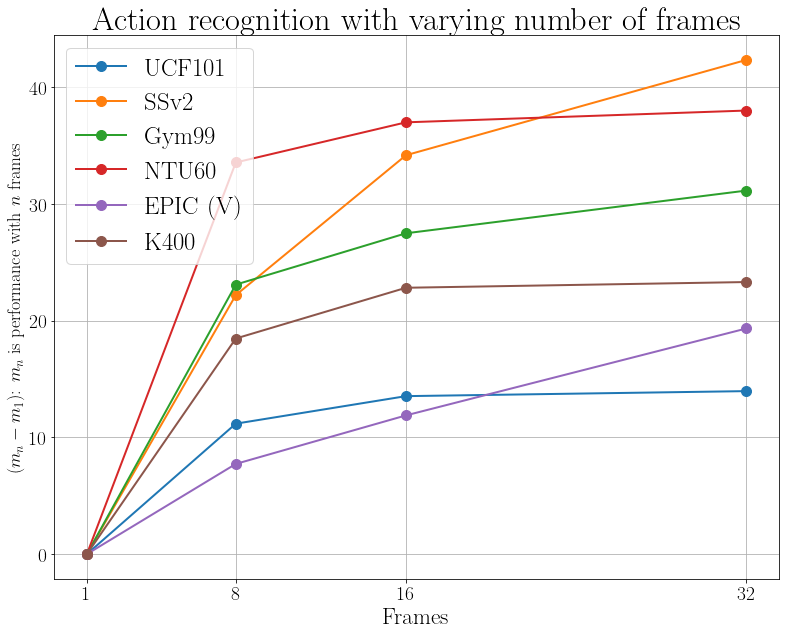

In [20]:
H, W = 10, 13

fig, ax = plt.subplots(figsize=(W, H))

for d in df.columns:
    if d == "Frames":
        continue
    ax.plot(delta_df["Frames"], delta_df[d], label=d, marker="o", markersize=10, linewidth=2.0)
    
ax.set_title(r"Action recognition with varying number of frames")
ax.set_xlabel("Frames")
ax.set_ylabel("($m_{n} - m_{1})$: $m_n$ is performance with $n$ frames")
ax.set_xticks(ticks=[1, 8, 16, 32])
configure_ax(ax=ax, H=H, W=W)

plt.savefig("../../results/plots/action_temporality_v2.pdf", bbox_inches="tight")
plt.show()

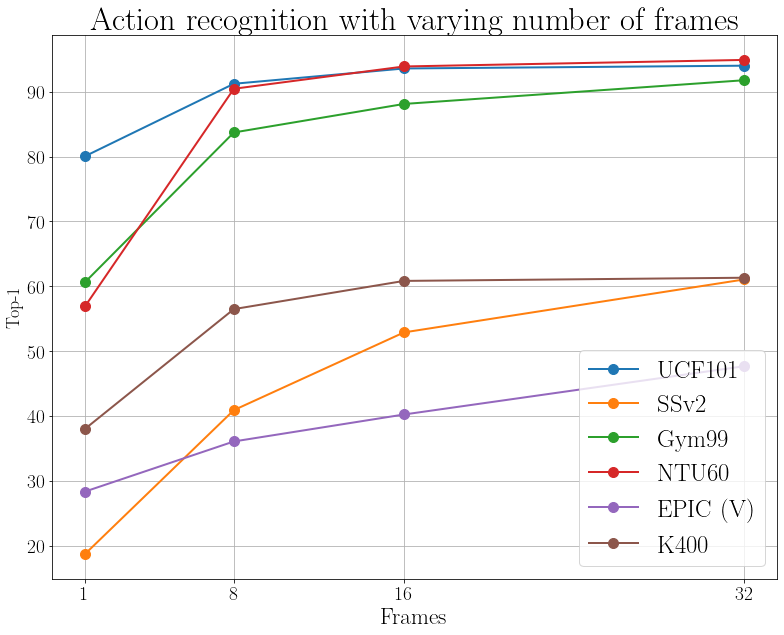

In [21]:
H, W = 10, 13

fig, ax = plt.subplots(figsize=(W, H))

for d in df.columns:
    if d == "Frames":
        continue
    ax.plot(df["Frames"], df[d], label=d, marker="o", markersize=10, linewidth=2.0)
    
ax.set_title(r"Action recognition with varying number of frames")
ax.set_xlabel("Frames")
ax.set_ylabel("Top-1")
ax.set_xticks(ticks=[1, 8, 16, 32])
configure_ax(ax=ax, H=H, W=W)

plt.savefig("../../results/plots/action_temporality_v3.pdf", bbox_inches="tight")
plt.show()

### Junk

In [82]:
diff_df = df.set_index("Frames")
diff_df = diff_df.diff(periods=1)
diff_df = diff_df.fillna(0)

In [83]:
diff_df

,UCF,SS,Gym99,NTU,EPIC (verbs),Kinetics
Frames,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.0
8,11.18,22.20,23.10,33.57,7.73,0.0
16,2.36,11.99,4.40,3.44,4.16,0.0
32,0.43,8.17,3.66,1.01,7.45,0.0


In [68]:
np.polyfit(x=df["Frames"].values, y=df["UCF"].values, deg=2)

array([-3.26733671e-02,  1.49562463e+00,  7.93862688e+01])

In [64]:
np.polyfit(x=df["Frames"].values, y=df["SS"].values, deg=2)

array([-0.06116741,  3.35406287, 16.14964724])

In [65]:
np.polyfit(x=df["Frames"].values, y=df["Gym99"].values, deg=2)

array([-0.06169646,  2.96645485, 59.52345328])

In [66]:
np.polyfit(x=df["Frames"].values, y=df["EPIC (verbs)"].values, deg=2)

array([-1.26945583e-02,  1.02666809e+00,  2.77085249e+01])